# Spatial Data Structures Analysis

In [26]:
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import numpy as np

quadTreeData = pd.read_csv("quadTest.csv")
kdTreeData = pd.read_csv("kdTest.csv")
bucketTestData = pd.read_csv("bucketTest.csv")

In [27]:
colorName = ['Blue','Gray','Green','Red','Purple','Brown','Pink','Orange','Cyan','Yellow']
colorList = ['#1f77b4','#7f7f7f','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#ff7f0e','#17becf','#ffff00'] 

For the data points represented below, I ran each test ten times and took the average of the run time in order to give a better estimate for the actual values by attempting to control for outliers.

### The Quad Tree

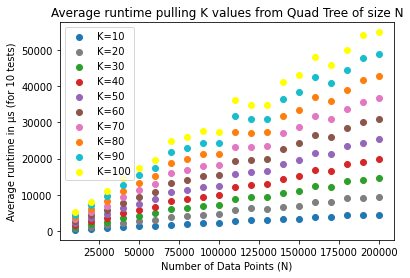

In [30]:
# quadTreeData

for index, row in quadTreeData.iterrows():
    idx = (int(row['K']/10) - 1)
    color = colorList[idx]
    if row['N'] < 20000:
        plt.scatter(row['N'],row['avgRuntime'],c=color,label=("K="+str(row['K'])))
    else:
        plt.scatter(row['N'],row['avgRuntime'],c=color)
plt.xlabel("Number of Data Points (N)")
plt.ylabel("Average runtime in \u03BCs (for 10 tests)")
plt.title("Average runtime pulling K values from Quad Tree of size N")
plt.legend()

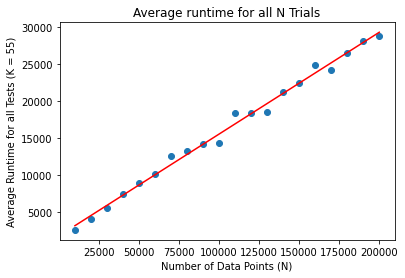

In [53]:
quadAvgDf = pd.DataFrame(columns =['N',"runTime"])
for x in range(1,21):
    temp = quadTreeData.loc[quadTreeData['N'] == x*10000]
    tempMean = temp.mean();
    quadAvgDf.loc[x] = [tempMean['N'],tempMean['avgRuntime']]
    
plt.scatter(quadAvgDf['N'],quadAvgDf['runTime'])
plt.xlabel("Number of Data Points (N)")
plt.ylabel("Average Runtime for all Tests (K = 55)")
plt.title("Average runtime for all N Trials")

avgQuadOls = sm.ols(formula="runTime ~ N",data=quadAvgDf).fit()
plt.plot(quadAvgDf['N'],avgQuadOls.predict(),color='r')

In [54]:
avgQuadOls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                runTime   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     2358.
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.53e-20
Time:                        13:38:39   Log-Likelihood:                -159.19
No. Observations:                  20   AIC:                             322.4
Df Residuals:                      18   BIC:                             324.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1754.2142    339.158      5.172      0.000    1041.669    2466.759
N              0.1375      0.003     48.563      0.000       0.132       0.143
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   2.338
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.252
Skew:                           0.237   Prob(JB):                        0.882
Kurtosis:                       2.723   Cond. No.                     2.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The Quad Tree is pretty straightforward, since it only works on dimension 2.  Because of this we can see that the runtime (more or less) increases linearly with the number of training data points (N) as well as the number of data points chosen (K).  <p>The top plot (the rainbow columns) shows a full description of how the runtime grows with the number of training data points.  You can trace a nearly straight line from one end to the other on a single color.  The bottom plot is the average of all the runtimes for each choice of N, therefore the average K value would be 55, this time with a linear regression plotted on top of it.  With a completely straight line, the R-squared value comes out as 0.99, which shows that we are extremely close to a perfect fit (though hopefully not overfit).  <p>

### KD Tree

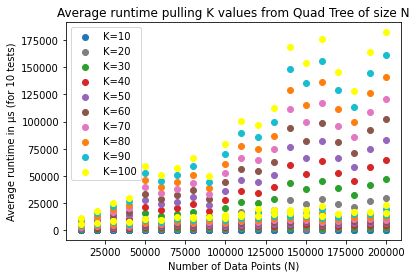

In [59]:
# kdTreeData

for index, row in kdTreeData.iterrows():
    idx = (int(row['K']/10)-1)
    color = colorList[idx]
    if row['N'] < 20000 and row['Dim']==1:
        plt.scatter(row['N'],row['avgRuntime'],c=color,label=("K="+str(row['K'])))
    else:
        plt.scatter(row['N'],row['avgRuntime'],c=color)
plt.xlabel("Number of Data Points (N)")
plt.ylabel("Average runtime in \u03BCs (for 10 tests)")
plt.title("Average runtime pulling K values from Quad Tree of size N")
plt.legend()
    

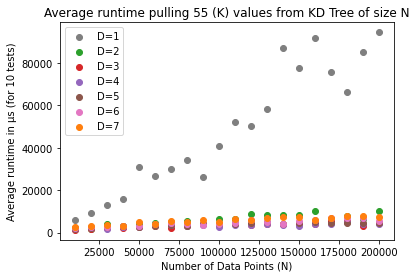

In [66]:
# kdTreeData

kdAvgDf = pd.DataFrame(columns = ['N','Dim','avgRuntime'])
for dim in range(1,8):
    for x in range(1,21):
        temp = kdTreeData.loc[(kdTreeData['Dim'] == dim) & (kdTreeData['N'] == x*10000)]
        tempMean = temp.mean()
        kdAvgDf.loc[x + ((dim-1) * 20)] = [tempMean['N'],tempMean['Dim'],tempMean['avgRuntime']]
        
kdAvgDf

for index, row in kdAvgDf.iterrows():
    if row['N'] == 10000:
        plt.scatter(row['N'],row['avgRuntime'],c=colorList[int(row['Dim'])],label=("D="+str(int(row["Dim"]))))
    else:
        plt.scatter(row['N'],row['avgRuntime'],c=colorList[int(row['Dim'])])
plt.xlabel("Number of Data Points (N)")
plt.ylabel("Average runtime in \u03BCs (for 10 tests)")
plt.title("Average runtime pulling 55 (K) values from KD Tree of size N")
plt.legend()

The KD tree really really struggles with the 1D and 2D stuff (I guess that's why we have Quad Trees). Striping those off =>

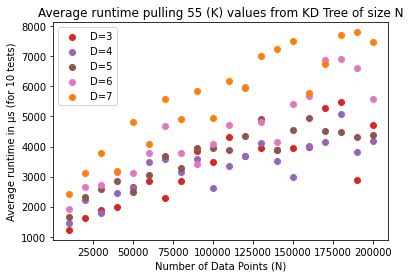

In [68]:
for index, row in kdAvgDf.iterrows():
    if row['N'] == 10000 and row['Dim'] > 2.0:
        plt.scatter(row['N'],row['avgRuntime'],c=colorList[int(row['Dim'])],label=("D="+str(int(row["Dim"]))))
    elif row['Dim'] > 2.0:
        plt.scatter(row['N'],row['avgRuntime'],c=colorList[int(row['Dim'])])
plt.xlabel("Number of Data Points (N)")
plt.ylabel("Average runtime in \u03BCs (for 10 tests)")
plt.title("Average runtime pulling 55 (K) values from KD Tree of size N")
plt.legend()

In [75]:
kdAvgDf7 = kdAvgDf.loc[kdAvgDf['Dim']==7.0]
kdAvgDf7Ols = sm.ols(formula="avgRuntime ~ N",data=kdAvgDf7).fit()
kdAvgDf7Ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avgRuntime   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     111.4
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           3.86e-09
Time:                        14:53:35   Log-Likelihood:                -156.42
No. Observations:                  20   AIC:                             316.8
Df Residuals:                      18   BIC:                             318.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2875.9111    295.346      9.737      0.000    2255.413    3496.409
N              0.0260      0.002     10.556      0.000       0.021       0.031
==============================================================================
Omnibus:                        1.399   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                0.943
Skew:                          -0.190   Prob(JB):                        0.624
Kurtosis:                       2.006   Cond. No.                     2.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Average runtime in μs (for 10 tests)')

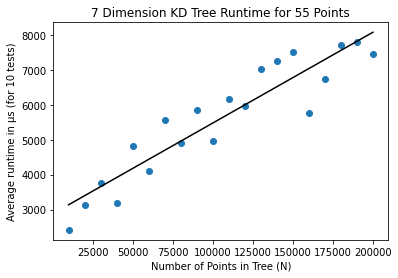

In [78]:
plt.scatter(kdAvgDf7['N'],kdAvgDf7['avgRuntime'])
plt.plot(kdAvgDf7['N'],kdAvgDf7Ols.predict(),color='k')
plt.title("7 Dimension KD Tree Runtime for 55 Points")
plt.xlabel("Number of Points in Tree (N)")
plt.ylabel("Average runtime in \u03BCs (for 10 tests)")

Pulling out the outliers of the 1D and 2D versions of the KD Tree, We can see that (generally speaking) runtime increases as the tree gets larger.  Pulling out the 7 dimension data (above) shows that the data has an (almost) logarithmic trend to it.  Granted, the linear regression performed does have an R-squared value of 0.86, showing a decent fit, indicating that it's probably not competely logarithmic.

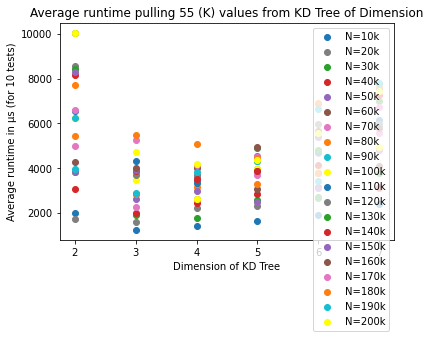

In [88]:
for index, row in kdAvgDf.loc[kdAvgDf['Dim'] > 1].iterrows():
    idx = int((row['N']/10000 - 1)%10)
    if row['Dim'] == 2:
        plt.scatter(row['Dim'],row['avgRuntime'],c=colorList[idx],label=("N="+str(int(row["N"]/1000))+"k"))
    else:
        plt.scatter(row['Dim'],row['avgRuntime'],c=colorList[idx])
plt.xlabel("Dimension of KD Tree")
plt.ylabel("Average runtime in \u03BCs (for 10 tests)")
plt.title("Average runtime pulling 55 (K) values from KD Tree of Dimension")
plt.legend()

The above plot doesn't tell us much except that the 2 dimensional KD Tree still has some major issues (which was already pretty obvious.  Unfortunately there's also limits to the number of colors I've included and having twice as many points per column.  Let's reduce the number of values present to make it easier to tease out what's going on.

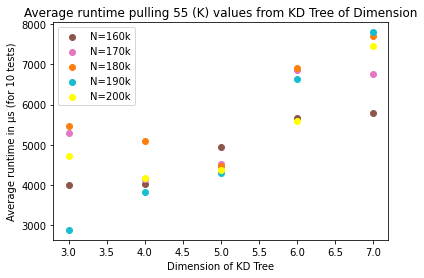

In [92]:
for index, row in kdAvgDf.loc[(kdAvgDf['Dim'] > 2) & (kdAvgDf['N'] > 150000)].iterrows():
    idx = int((row['N']/10000 - 1)%10)
    if row['Dim'] == 3:
        plt.scatter(row['Dim'],row['avgRuntime'],c=colorList[idx],label=("N="+str(int(row["N"]/1000))+"k"))
    else:
        plt.scatter(row['Dim'],row['avgRuntime'],c=colorList[idx])
plt.xlabel("Dimension of KD Tree")
plt.ylabel("Average runtime in \u03BCs (for 10 tests)")
plt.title("Average runtime pulling 55 (K) values from KD Tree of Dimension")
plt.legend()

Looking at the plot above we can see that after stripping the lower dimensions and N values that the runtime appears to be increasing exponentially, though again, the lowest dimension in this plot still has some decent variance in the distribution.

In [102]:
kdAvgDf190 = kdAvgDf.loc[(kdAvgDf['N'] == 190000) & (kdAvgDf['Dim']>2)]
ols190 = sm.ols(formula="avgRuntime ~ Dim * Dim + N",data=kdAvgDf190).fit()
ols190.summary()

/Users/trentevans/.pyenv/versions/3.8.2/lib/python3.8/site-packages/statsmodels/stats/stattools.py:70: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avgRuntime   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     57.89
Date:                Tue, 23 Jun 2020   Prob (F-statistic):            0.00471
Time:                        15:51:43   Log-Likelihood:                -37.142
No. Observations:                   5   AIC:                             78.28
Df Residuals:                       3   BIC:                             77.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.429e-08   2.39e-08     -1.433      0.247    -1.1e-07    4.19e-08
Dim         1264.9800    166.253      7.609      0.005     735.889    1794.071
N             -0.0065      0.005     -1.433      0.247      -0.021       0.008
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.231
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.304
Skew:                          -1.250   Prob(JB):                        0.521
Kurtosis:                       2.882   Cond. No.                     9.81e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.88e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0, 0.5, 'Average runtime in μs (for 10 tests)')

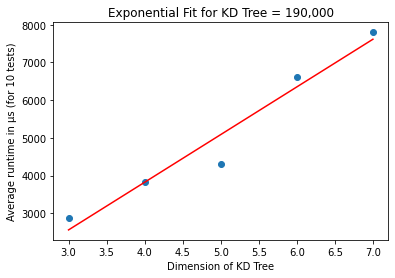

In [103]:
plt.scatter(kdAvgDf190['Dim'],kdAvgDf190['avgRuntime'])
plt.plot(kdAvgDf190['Dim'],ols190.predict(),color='r')
plt.title("Exponential Fit for KD Tree = 190,000")
plt.xlabel("Dimension of KD Tree")
plt.ylabel("Average runtime in \u03BCs (for 10 tests)")

So the linear regression doesn't look exponential, but the formula is.  With a squared dimension and adding the number of points, we were able to achieve an R squared value of 0.93.  This may be due to the fact that I cut the data after dimension 2.  One way or another, it appears that we're seeing the behavior we expect

### Bucket KNN

For reasons that I don't understand my timing tests always decided to just stop running around dimension 5 with 40,000 points.  So... unfortunately I don't have as much data as I would like.  But I do have the values up until then

In [106]:
bucketTestData

,structName,structType,K,N,Dim,avgRuntime
0,Bucket,0,10,10000,1,29
1,Bucket,0,20,10000,1,57
2,Bucket,0,30,10000,1,88
3,Bucket,0,40,10000,1,119
4,Bucket,0,50,10000,1,151
...,...,...,...,...,...,...
795,Bucket,0,60,200000,4,41475
796,Bucket,0,70,200000,4,54130
797,Bucket,0,80,200000,4,70233
798,Bucket,0,90,200000,4,83597


Text(0, 0.5, 'Runtime in μs')

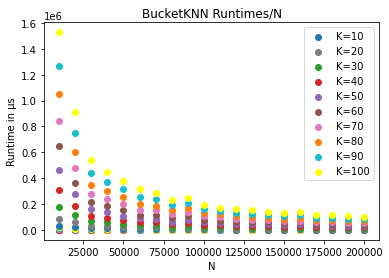

In [107]:
bucketTestData

for index, row in bucketTestData.iterrows():
    idx = (int(row['K']/10) - 1)
    color = colorList[idx]
    if row['N'] < 20000 and row['Dim']==1:
        plt.scatter(row['N'],row['avgRuntime'],c=color,label=("K="+str(row['K'])))
    else:
        plt.scatter(row['N'],row['avgRuntime'],c=color)
plt.legend()
plt.title("BucketKNN Runtimes/N")
plt.xlabel("N")
plt.ylabel("Runtime in \u03BCs")

So, again, not much to be seen here.  Although I will admit that I'm surprised that there seems to be a negative logarithmic trend.  I'm curious to see how that goes

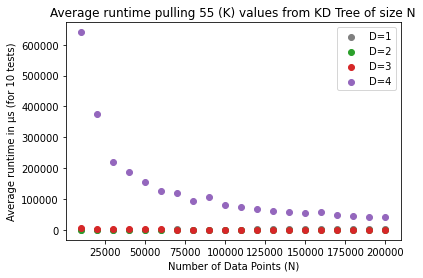

In [112]:
bucketAvgDf = pd.DataFrame(columns = ['N','Dim','avgRuntime'])
for dim in range(1,5):
    for x in range(1,21):
        temp = bucketTestData.loc[(bucketTestData['Dim'] == dim) & (bucketTestData['N'] == x*10000)]
        tempMean = temp.mean()
        bucketAvgDf.loc[x + ((dim-1) * 20)] = [tempMean['N'],tempMean['Dim'],tempMean['avgRuntime']]
        
# bucketAvgDf

for index, row in bucketAvgDf.iterrows():
    if row['N'] == 10000:
        plt.scatter(row['N'],row['avgRuntime'],c=colorList[int(row['Dim'])],label=("D="+str(int(row["Dim"]))))
    else:
        plt.scatter(row['N'],row['avgRuntime'],c=colorList[int(row['Dim'])])
plt.xlabel("Number of Data Points (N)")
plt.ylabel("Average runtime in \u03BCs (for 10 tests)")
plt.title("Average runtime pulling 55 (K) values from KD Tree of size N")
plt.legend()

So, it appears that the dimension is fine, except for D = 4.  What happens if we pull that data out?

Text(0.5, 1.0, 'Average runtime pulling 55 (K) values from BucketKNN of Dimension')

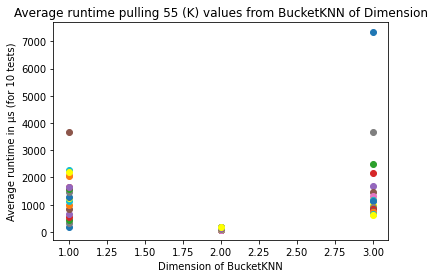

In [120]:
for index, row in bucketAvgDf.loc[bucketAvgDf['Dim'] < 4].iterrows():
    idx = int((row['N']/10000 - 1)%10)
    if row['Dim'] == 1:
        plt.scatter(row['Dim'],row['avgRuntime'],c=colorList[idx],label=("N="+str(int(row["N"]/1000))+"k"))
    else:
        plt.scatter(row['Dim'],row['avgRuntime'],c=colorList[idx])
plt.xlabel("Dimension of BucketKNN")
plt.ylabel("Average runtime in \u03BCs (for 10 tests)")
plt.title("Average runtime pulling 55 (K) values from BucketKNN of Dimension")
# plt.legend()

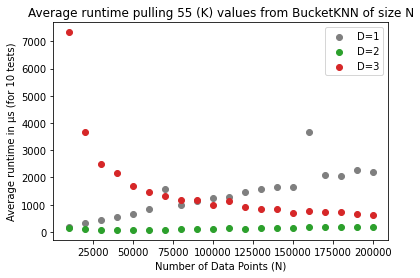

In [114]:
for index, row in bucketAvgDf.loc[bucketAvgDf['Dim'] < 4].iterrows():
    if row['N'] == 10000:
        plt.scatter(row['N'],row['avgRuntime'],c=colorList[int(row['Dim'])],label=("D="+str(int(row["Dim"]))))
    else:
        plt.scatter(row['N'],row['avgRuntime'],c=colorList[int(row['Dim'])])
plt.xlabel("Number of Data Points (N)")
plt.ylabel("Average runtime in \u03BCs (for 10 tests)")
plt.title("Average runtime pulling 55 (K) values from BucketKNN of size N")
plt.legend()

So, the third dimension also has the negative logarithm thing going on.  I'm definitly surprised that the first dimension has higher runtimes than the second dimension.  It appears that the BucketKNN seems to have the same problem as the KDTree, though I don't imagine it's for the same reason.  I think we'll look at D = 2 and check the regression with that data

In [123]:
bucket1D = bucketAvgDf.loc[bucketAvgDf['Dim'] == 1]
ols2D = sm.ols(formula = "avgRuntime ~ Dim * Dim + N",data=bucket1D).fit()
ols2D.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avgRuntime   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     51.45
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           1.12e-06
Time:                        19:28:41   Log-Likelihood:                -148.72
No. Observations:                  20   AIC:                             301.4
Df Residuals:                      18   BIC:                             303.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.9434    100.473      0.636      0.533    -147.143     275.030
Dim           63.9434    100.473      0.636      0.533    -147.143     275.030
N              0.0120      0.002      7.173      0.000       0.009       0.016
==============================================================================
Omnibus:                       38.285   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.315
Skew:                           3.114   Prob(JB):                     1.00e-22
Kurtosis:                      12.098   Cond. No.                     6.73e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.33e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0, 0.5, 'Average runtime (μs)')

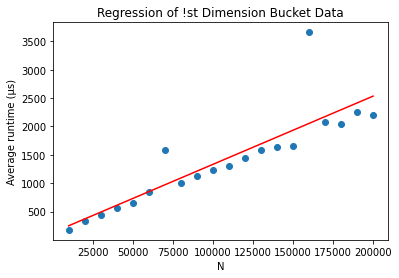

In [126]:
plt.scatter(bucket1D['N'],bucket1D['avgRuntime'])
plt.plot(bucket1D['N'],ols2D.predict(),color='r')
plt.title("Regression of 1st Dimension Bucket Data")
plt.xlabel("N")
plt.ylabel("Average runtime (\u03BCs)")

Surprisingly, the R-squared value for the first dimension was actually better than the second dimension, so I went for that. Again, the squared dimension value seemed to be the best predictor of the regression.

### Conclusions

I didn't do a ton of analysis considering K as a parameter, mostly because it doesn't seem like a particularly important or exciting parameter.  Every plot that has included K in some way has show that as you're pulling more points it takes longer.<p>
    
That being said, It seems that the biggest factors involved in the runtime are the dimension and the number of points in the tree/bucket (N), with the dimension having the largest impact on the data by far.  This makes sense because the computer has to deal with larger amounts of data because the data size is essentially the dimension squared.  <p>
    
Overall, for data over 2 dimensions, I would probably opt towards the KD Tree for its speed.  For data two dimensions and under I would opt towards the quad tree.  Ultimately the choice of data structure depends on the type of data.  The BucketKNN is particularly effective for points that are more uniformly distributed rather than those that are more normally distributed. 